### Colab Activity 16.2: Decision Boundaries for Different Classification Models

**Expected Time = 60 minutes**


This activity continues to examine how different classifiers decision boundaries shift as parameters change.  Both the `DecisionTreeClassifier` and its `max_depth` hyperparameter and the `KNeighborsClassifier` and its `n_neighbors` parameter will be explored.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

### The Data

Below, the scikitlearn wine dataset from the videos is loaded and displayed.  You will follow the example using `['total_phenols', 'color_intensity']` as predictors.  The `make_plot` function will plot the decision boundary of a given estimator.

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X1 = X[['total_phenols', 'color_intensity']]

In [4]:
def make_plot(estimator):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'flare')

[Back to top](#-Index)

### Problem 1

#### KNN with `n_neighbors = 1`



Below, create and fit a `Pipeline` named `knn_pipe_1` with steps: 

- `scale`: `StandardScaler` applied to polynomial features
- `model`: `KNeighborsClassifier` with `n_neighbors = 1`

Fit this pipeline to the data `X1` and `y`.



Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=1))])


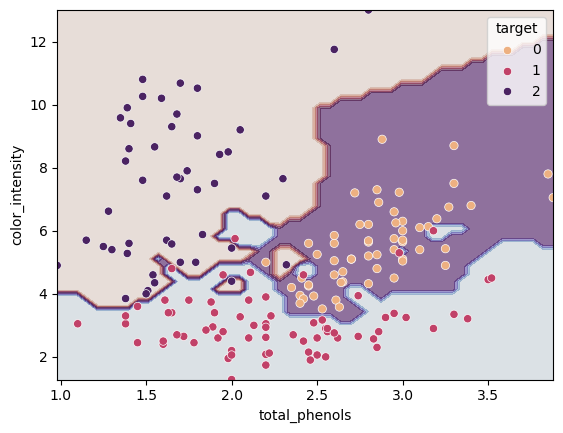

In [5]:

knn_pipe_1 = ''

knn_pipe_1 = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=1))
])

knn_pipe_1.fit(X1, y)

### ANSWER CHECK
print(knn_pipe_1)
make_plot(knn_pipe_1)

[Back to top](#-Index)

### Problem 2

#### KNN with `n_neighbors = 5`



Below, create and fit a `Pipeline` named `knn_pipe_5` with steps: 

- `scale`: `StandardScaler` applied to polynomial features
- `model`: `KNeighborsClassifier` with `n_neighbors = 5`

Fit this pipeline to the data `X1` and `y`.

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])


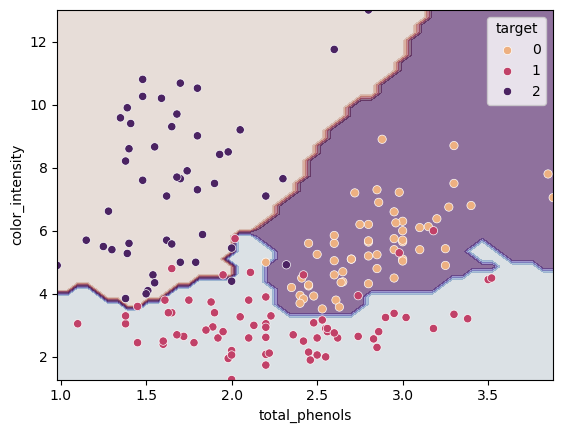

In [6]:

knn_pipe_5 = ''

knn_pipe_5 = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

knn_pipe_5.fit(X1, y)


### ANSWER CHECK
print(knn_pipe_5)
make_plot(knn_pipe_5)

[Back to top](#-Index)

### Problem 3

#### `DecisionTreeClassifier` with `max_depth = 2`



Now, fit to the data `X1` and `y` a `DecisionTreeClassifier` with `max_depth = 2` and assign to `tree_depth_2` below.  Visualize the results and note the complexity of the decision boundary.

DecisionTreeClassifier(max_depth=2)


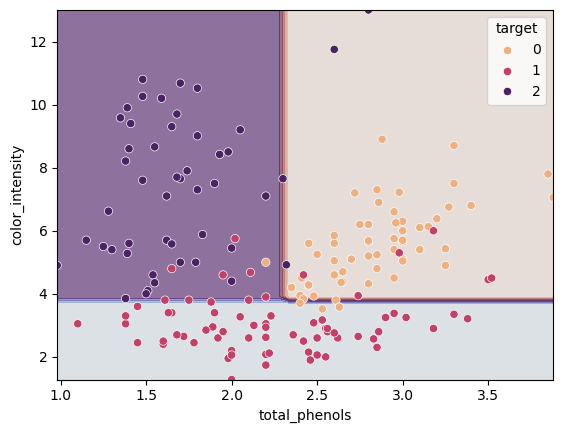

In [7]:

tree_depth_2 = ''

tree_depth_2 = DecisionTreeClassifier(max_depth=2)
tree_depth_2.fit(X1, y)

### ANSWER CHECK
print(tree_depth_2)
make_plot(tree_depth_2)

[Back to top](#-Index)

### Problem 4

#### DecisionTreeClassifier with `max_depth = None`



Finally, fit to the data `X1` and `y` a `DecisionTreeClassifier` with `max_depth = None` and assign to `tree_depth_none` below.  Visualize the results and note the complexity of the decision boundary.

DecisionTreeClassifier()


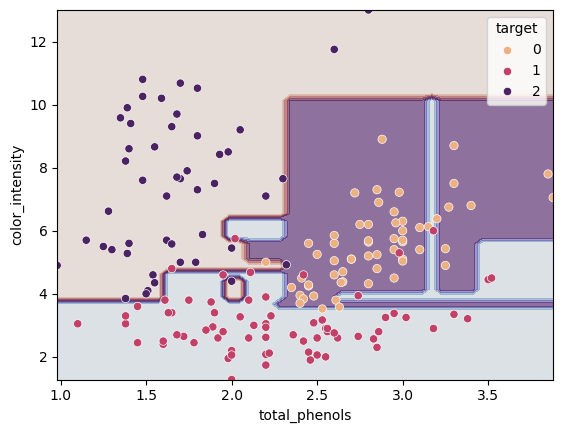

In [8]:

tree_depth_none = ''

tree_depth_none = DecisionTreeClassifier(max_depth=None)
tree_depth_none.fit(X1, y)

### ANSWER CHECK
print(tree_depth_none)
make_plot(tree_depth_none)

### Problem 5

#### Complexity and Parameters in KNN and Decision Tree



Based on the above results, which of the statements below would execute to increase the complexity of the decision boundaries?

```
a. Increase in `max_depth` and `n_neighbors`
b. Decrease in `max_depth` and `n_neighbors`
c. Increase in `max_depth` and  Decrease in `n_neighbors`
d. Decrease in `max_depth` and Increase in `n_neighbors`
```

Enter your answer choice as a string to `ans_5` below.

In [9]:

ans_5 = ''

ans_5 = 'c'

### ANSWER CHECK
print(ans_5)

c


# Exercise Summary

### Overview
This exercise explored how different classifier parameters affect decision boundaries using the wine dataset with two features: 'total_phenols' and 'color_intensity'.

### Models Explored
1. **K-Nearest Neighbors (KNN)**
   - n_neighbors=1: Created very detailed, complex boundaries
   - n_neighbors=5: Produced smoother, more generalized boundaries
   - Required StandardScaler for optimal performance

2. **Decision Trees**
   - max_depth=2: Generated simple, rectangular decision regions
   - max_depth=None: Created complex, highly-fitted boundaries
   - No scaling needed due to tree's invariance to feature scales

### Key Takeaways
1. **Model Complexity Trade-offs:**
   - KNN: Lower k → Higher complexity → Risk of overfitting
   - Decision Trees: Higher depth → Higher complexity → Risk of overfitting

2. **Parameter Relationships:**
   - Complexity increases when:
     - Decreasing n_neighbors in KNN
     - Increasing max_depth in Decision Trees

3. **Preprocessing Considerations:**
   - KNN requires feature scaling
   - Decision Trees can work with raw features

4. **Visual Patterns:**
   - KNN creates smooth, curved boundaries
   - Decision Trees create rectangular, axis-aligned boundaries

This exercise effectively demonstrated how model parameters directly influence the balance between underfitting and overfitting.